<a href="https://colab.research.google.com/github/raulbenitez/DAPR/blob/master/simple_kmeans_mpg_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load mgp data from seaborn

In [2]:
import seaborn as sns
dmpg = sns.load_dataset('mpg')
dmpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
dmpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

Choose which variables to keep

In [8]:
df2 = dmpg[['weight','acceleration']]
df2.head()

,weight,acceleration
0,3504,12.0
1,3693,11.5
2,3436,11.0
3,3433,12.0
4,3449,10.5


Remove all variables except weight and acceleration

In [10]:
df1 = dmpg.drop(['mpg', 'cylinders', 'displacement', 'horsepower', 'model_year', 'origin', 'name'],axis=1)
df1.head()

,weight,acceleration
0,3504,12.0
1,3693,11.5
2,3436,11.0
3,3433,12.0
4,3449,10.5


plot the two variables to take a look (scatterplot)

<Axes: xlabel='weight', ylabel='acceleration'>

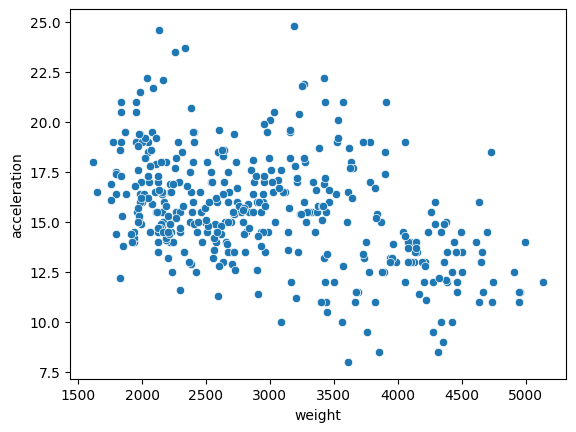

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()
sns.scatterplot(y='acceleration',x='weight',data=df1)

Apply a simple clustering algorithm to find two clusters in data (k-means)


In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto") #define my clustering method
kmeans_fitted = kmeans.fit(df1) # fit the model using data



In [33]:
kmeans_fitted.labels_ # clustering labels indicating cluster


array([2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2,

In [34]:
df1['cluster'] = kmeans_fitted.labels_ # add a new column to the dataframe with the cluster labels

<Axes: xlabel='weight', ylabel='acceleration'>

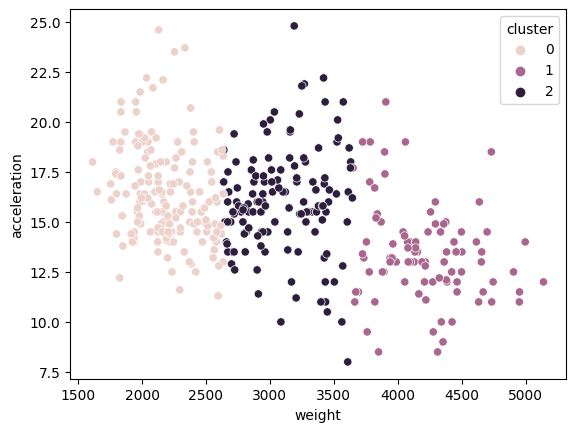

In [35]:

fig = plt.figure()
sns.scatterplot(y='acceleration',x='weight',hue = 'cluster',data=df1)